In [1]:
from RGBHallucinator import Hallucinator
import os 

import cv2

1.8.0


In [2]:
depthFile = "/home/kgunase3/data/NYUD/guptaDepth.txt"
rgbFiles  = "/home/kgunase3/data/NYUD/guptaRGB.txt"
with open(depthFile) as fh :
    depthImages =[path[:-1] for path in fh] 
with open(rgbFiles) as fh :
    rgbImages =[path[:-1] for path in fh] 
    
samples = depthImages[:10]
samplesDepth = [cv2.imread(i) for i in samples]
samplesRGB   = [cv2.imread(i) for i in rgbImages[:10]]


In [3]:
H_rmse = Hallucinator('config_rmse.ini',4,0)
inp,gt = H_rmse.dataObj.nextTestBatch()
hal    = H_rmse.getHallucinatedImages(samples)
hal.shape

Initializing Hallucinator class
Reading configuration File
Relu activation has been chosen
BATCH Normalization has been chosen
Using the latest trained model in check point file
 Model at /home/kgunase3/data/NYUD/models/rgbHallucination_rmse_s4/rgbHallucination_rmse_s4-33820 restored
Initializing Data Reader
Train files 108256
Test  files 27064
Initialization Complete
/home/kgunase3/data/NYUD/models/rgbHallucination_rmse_s4
INFO:tensorflow:Restoring parameters from /home/kgunase3/data/NYUD/models/rgbHallucination_rmse_s4/rgbHallucination_rmse_s4-33820


(10, 120, 160, 3)

In [4]:
import tensorflow as tf 
tf.reset_default_graph()
H_rmse = Hallucinator('config_smooth_rmse.ini',4,0)
inp,gt = H_rmse.dataObj.nextTestBatch()
hal_smooth    = H_rmse.getHallucinatedImages(samples)
hal_smooth.shape

Initializing Hallucinator class
Reading configuration File
Relu activation has been chosen
BATCH Normalization has been chosen
Using the latest trained model in check point file
 Model at /home/kgunase3/data/NYUD/models/rgbHallucination_smooth_rmse_s4/rgbHallucination_smooth_rmse_s4-33820 restored
Initializing Data Reader
Train files 108256
Test  files 27064
Initialization Complete
/home/kgunase3/data/NYUD/models/rgbHallucination_smooth_rmse_s4
INFO:tensorflow:Restoring parameters from /home/kgunase3/data/NYUD/models/rgbHallucination_smooth_rmse_s4/rgbHallucination_smooth_rmse_s4-33820


(10, 120, 160, 3)

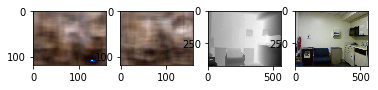

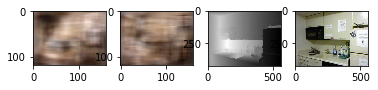

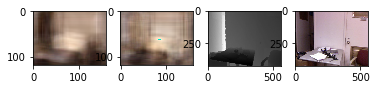

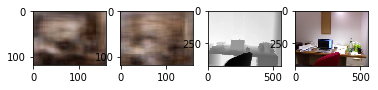

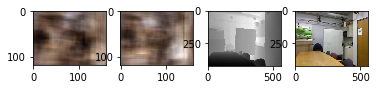

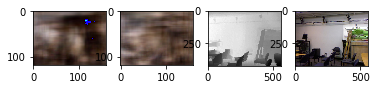

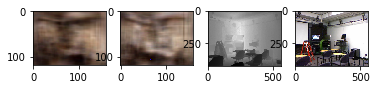

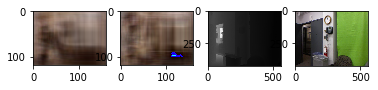

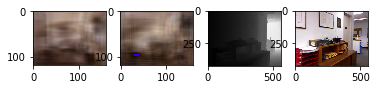

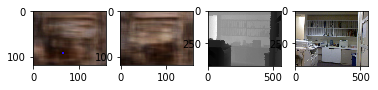

In [5]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
for i,ig in enumerate(hal_smooth) :
    img = cv2.cvtColor(np.uint8(ig),cv2.COLOR_BGR2RGB)
    plt.figure()
    plt.title("Smooth RMSE Depth RGB")
    plt.subplot(141)
    plt.imshow(img)
    plt.subplot(142)
    plt.imshow(cv2.cvtColor(np.uint8(hal[i]),cv2.COLOR_BGR2RGB))
    plt.subplot(143)
    plt.imshow(samplesDepth[i])
    plt.subplot(144)
    plt.imshow(cv2.cvtColor(samplesRGB[i],cv2.COLOR_BGR2RGB))

<pre>
Smooth+RMSE   RMSE       Depth       RGB</pre>
   
   
To Show the images bigger for visualization:

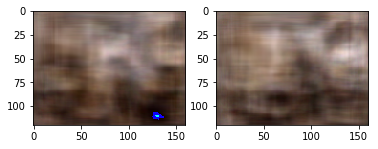

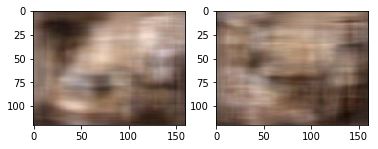

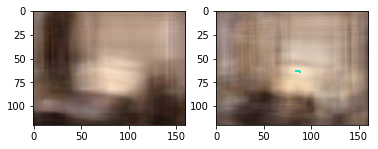

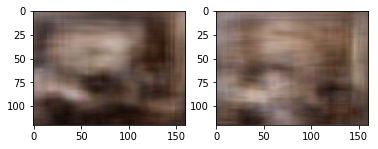

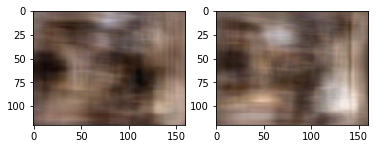

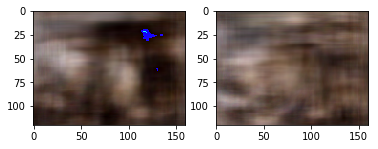

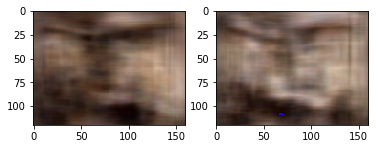

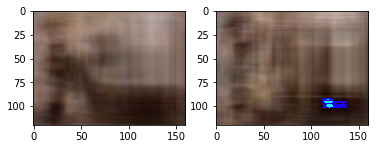

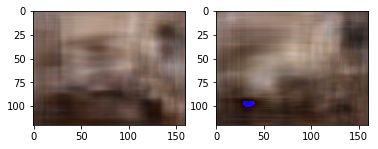

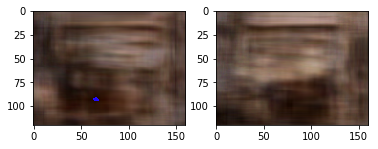

In [8]:


for i,ig in enumerate(hal_smooth) :
    img = cv2.cvtColor(np.uint8(ig),cv2.COLOR_BGR2RGB)
    plt.figure()
    plt.title("Smooth RMSE Depth RGB")
    plt.subplot(121)
    plt.imshow(img)
    plt.subplot(122)
    plt.imshow(cv2.cvtColor(np.uint8(hal[i]),cv2.COLOR_BGR2RGB))


<pre>
    Smooth+RMSE                 RMSE   </pre>